# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [124]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Импорт библиотек и модулей

In [125]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from modules.snippets import *
from sklearn.metrics import accuracy_score
from scipy import signal

In [126]:
def drawing_graph(X, Y):
    figure = plt.figure(figsize=(15, 5))
    axes = plt.axes()
    axes.grid(which='major', linewidth=1)
    axes.grid(which='minor', linestyle='--', color='gray', linewidth=0.5)

    axes.plot(X, Y)
    
    
    axes.xaxis.set_minor_locator(AutoMinorLocator())
    axes.yaxis.set_minor_locator(AutoMinorLocator())
    axes.tick_params(which='major', length=5, width=2)
    axes.tick_params(which='minor', length=2, width=2)
    plt.show()


### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

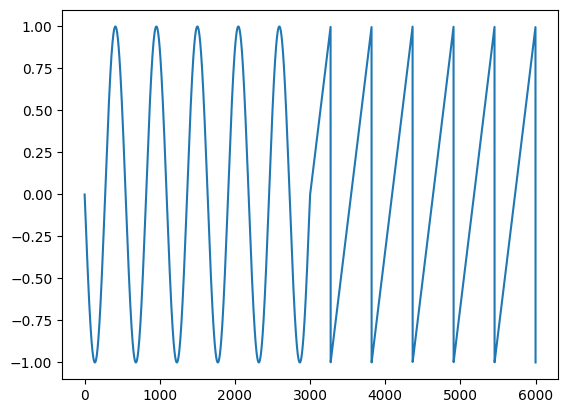

In [127]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [128]:
#Поиск сниппетов
snp = snippets(ts, 600, 2)

<Axes: >

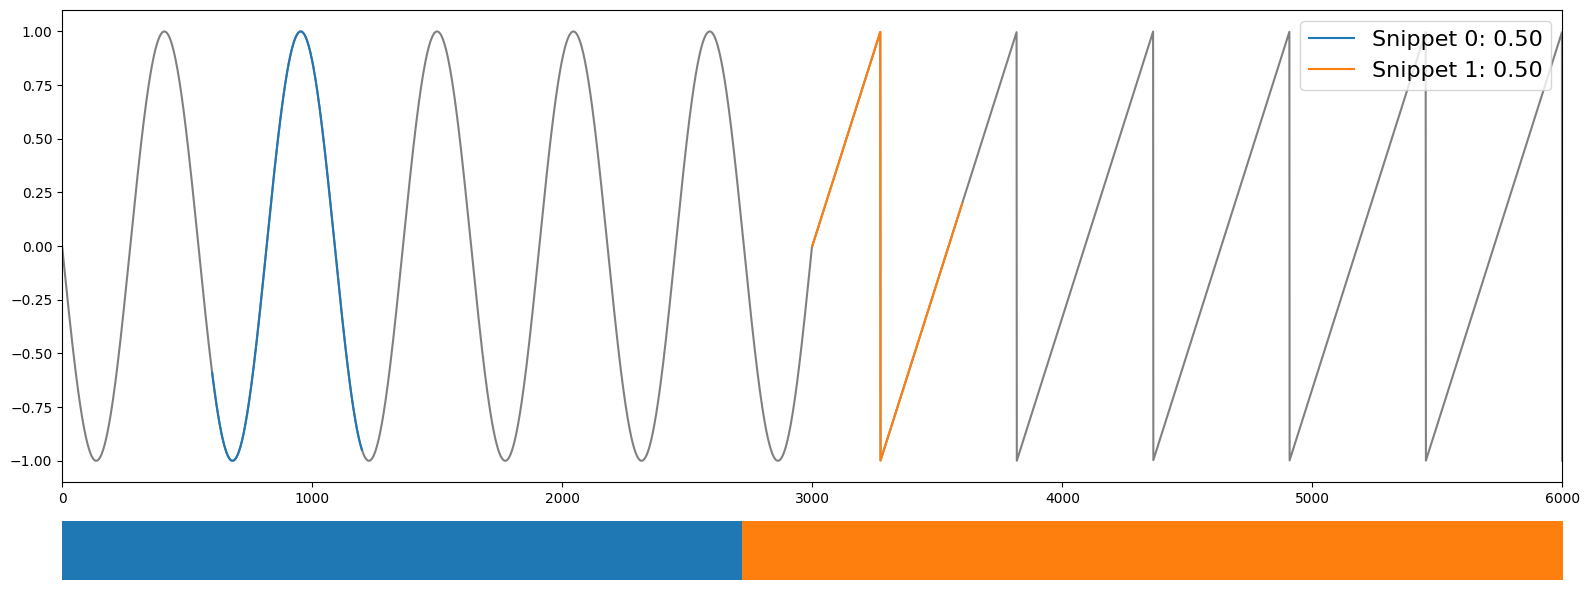

In [129]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «X» (угол крена) на временном интервале от 950 сек. до 109 сек.** из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из модуля snippets.py.

In [130]:
os.chdir('A:/Working folder/Time series analysis/Time-series-analysis/practice/05 Snippets/datasets/PAMAP')
data = list(np.loadtxt('PAMAP.txt', delimiter=' ', unpack=True))

In [131]:
data = pd.DataFrame(data)

In [132]:
ts = data.copy()
ts = ts[ts.iloc[:, 0]>600]
ts = ts[ts.iloc[:, 0]<630]

In [133]:
classes = np.unique(ts.iloc[:, 1])
number_classes = classes.shape[0]
print("classes:", classes, "\t", "number_classe:", number_classes)

classes: [2. 3.] 	 number_classe: 2


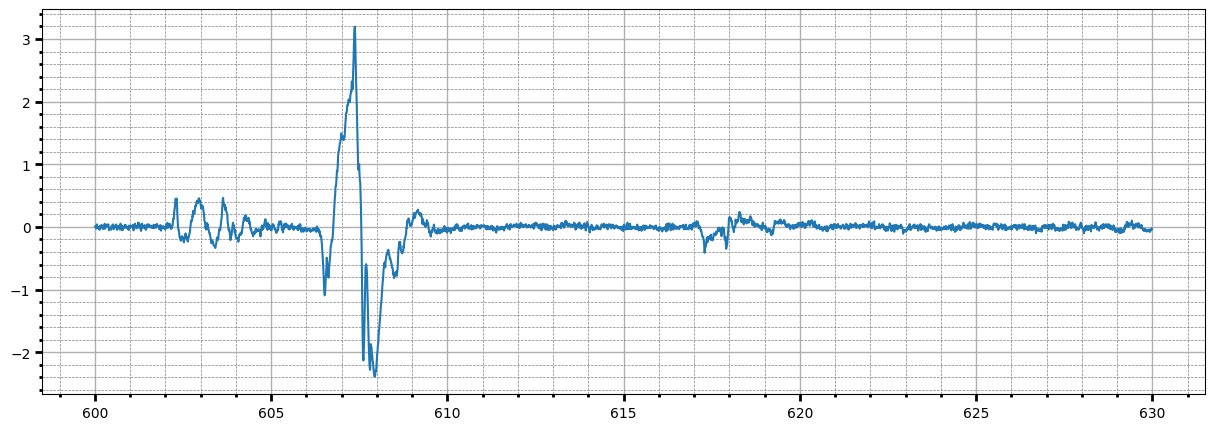

In [134]:
drawing_graph(ts.iloc[:, 0].values, ts.iloc[:, 10].values)

In [135]:
snp = snippets(ts.iloc[:, 10].values, 600, number_classes)

<Axes: >

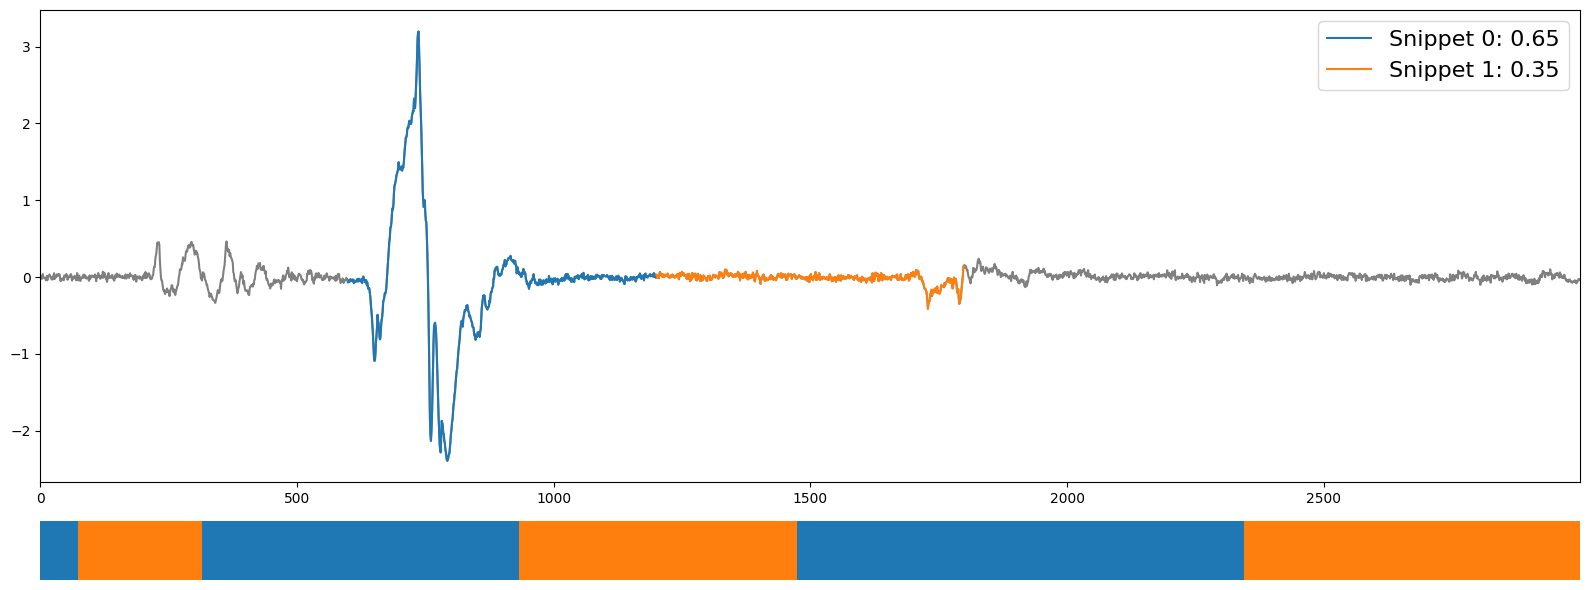

In [136]:
plot_snippets(ts.iloc[:, 10].values, snp)

Оцените точность разметки, полученной при помощи сниппетов.

In [137]:
def create_predictions(ts, snp):
    predictions = np.zeros_like(ts)
    for i, snippet in enumerate(snp):
        neighbors = np.array(snippet["neighbors"])
        for neighbor_index in neighbors:
            predictions[neighbor_index] = i
    return predictions

def plot_recognition(validation,predictions):
    figure = plt.figure(figsize=(15, 5))
    axes = plt.axes()
    axes.grid(which='major', linewidth=1)
    axes.grid(which='minor', linestyle='--', color='gray', linewidth=0.5)
    
    axes.plot(validation,  c = "black")
    axes.plot(predictions, c = "orange")
         
    axes.xaxis.set_minor_locator(AutoMinorLocator())
    axes.yaxis.set_minor_locator(AutoMinorLocator())
    axes.tick_params(which='major', length=5, width=2)
    axes.tick_params(which='minor', length=2, width=2)
    plt.show()

In [138]:
predictions = create_predictions(ts.iloc[:, 0], snp)
validation = ts.iloc[:, 1]
validation = np.where(validation == 3, 0, validation)
validation = np.where(validation == 2, 1, validation)

print("Точность разметки: ", accuracy_score(validation, predictions) * 100)

Точность разметки:  50.31677225741914


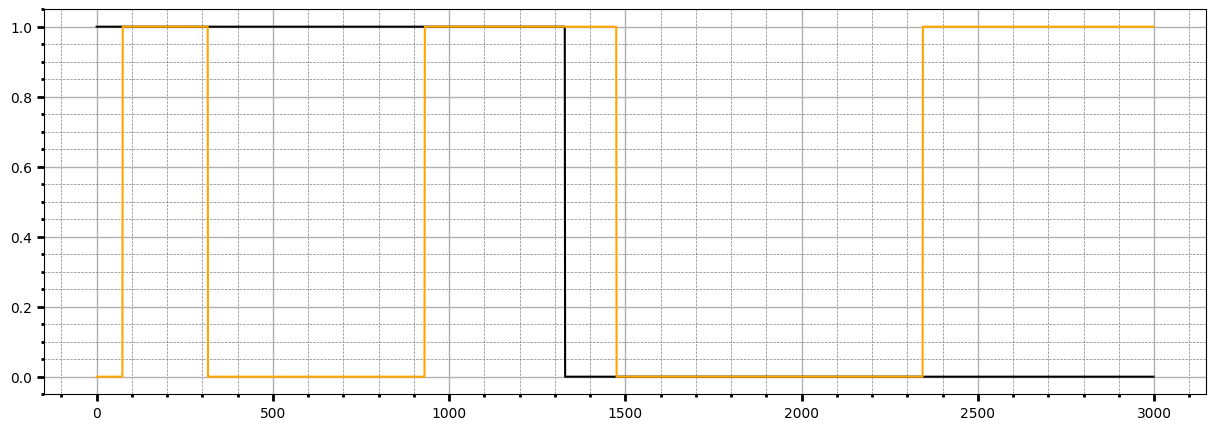

In [139]:
plot_recognition(validation,predictions)

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Хоть сниппеты находят различные классы, точность распознования очень низкая.

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1.

In [140]:
ts_gyroscope = ts.iloc[:, 10:13]
predictions = []
for i in range(ts_gyroscope.shape[1]):
    prediction = snippets(ts_gyroscope.iloc[:, i].values, 600, number_classes)
    predictions.append(create_predictions(ts.iloc[:, 0], prediction))
predictions = np.array(predictions)

result = np.zeros(predictions.shape[1])
for i in range(predictions.shape[1]):
    mean = np.mean(predictions[:, i])
    if mean > 0.5:
        result[i] = 1

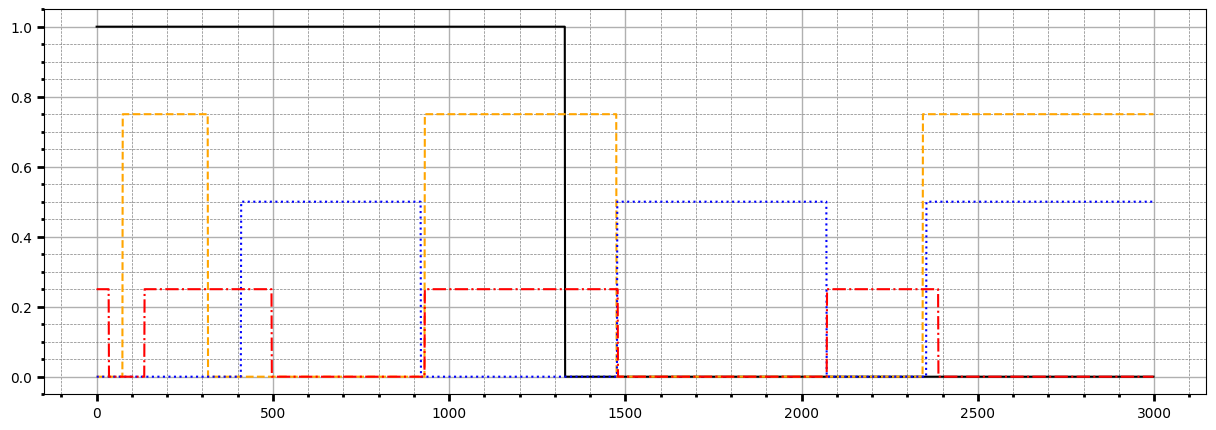

In [141]:
figure = plt.figure(figsize=(15, 5))
axes = plt.axes()
axes.grid(which='major', linewidth=1)
axes.grid(which='minor', linestyle='--', color='gray', linewidth=0.5)
axes.plot(validation,  c = "black")
axes.plot(predictions[0, :]*0.75, c = "orange", ls = "--")
axes.plot(predictions[1, :]*0.5, c = "blue", ls = ":")
axes.plot(predictions[2, :]*0.25, c = "red", ls = "-.")
axes.xaxis.set_minor_locator(AutoMinorLocator())
axes.yaxis.set_minor_locator(AutoMinorLocator())
axes.tick_params(which='major', length=5, width=2)
axes.tick_params(which='minor', length=2, width=2)
plt.show()

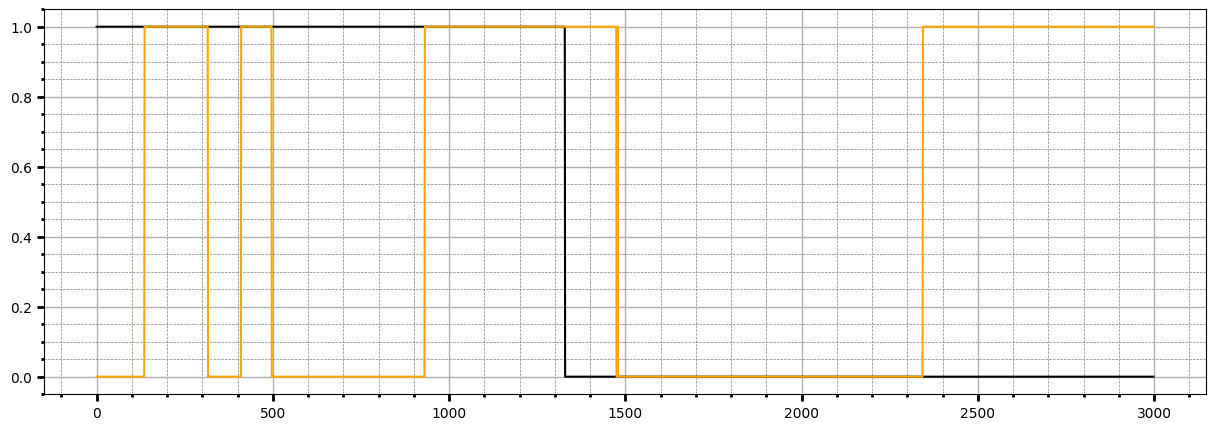

In [142]:
plot_recognition(validation,result)

Оцените точность разметки, полученной при помощи сниппетов.

In [143]:
validation = ts.iloc[:, 1]
validation = np.where(validation == 3, 0, validation)
validation = np.where(validation == 2, 1, validation)

print("Точность разметки: ", accuracy_score(validation, result) * 100)

Точность разметки:  51.08369456485495


❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

Использование нескольких признаков не приводит к улучшению результата.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [11]:
# INSERT YOUR CODE

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [12]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?